In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Read matrices generated in R

In [2]:
from IFD_tsne import *
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from utils import MidpointNormalize, load_data
import matplotlib.pyplot as plt
import tikzplotlib

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(fontsizes.aistats2022())
plt.rcParams['axes.grid'] = False

### Load matrices generated in R

In [3]:
selected_data = pd.read_csv('datasets/AGEMAP/selected_data.txt')
selected_data = selected_data.values
labels = pd.read_csv('datasets/AGEMAP/labels.txt', header=None)
labels = labels.values.flatten().tolist()[1:]
key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)


I0000 00:00:1714478080.816412       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.19 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.6115, 50 iterations in 0.3739 sec
Iteration  100, KL divergence 1.5267, 50 iterations in 0.3479 sec
Iteration  150, KL divergence 1.4303, 50 iterations in 0.3538 sec
Iteration  200, KL divergence 1.4014, 50 iterations in 0.3452 sec
Iteration  250, KL divergence 1.3857, 50 iterations in 0.3391 sec
   --> Time elapsed: 1.76 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.5425, 50 iterations in 0.3389 sec
Iteration  100, KL divergence 0.4040, 50 iterations in 0.3373 sec
Iteration  150, KL divergence 0.3565, 50 iterations in 0.3515 sec
Iteration  200, KL divergence 0.3366, 50 iterations in 0.3800 sec
Iteration 

In [4]:
mean = pd.read_csv('datasets/AGEMAP/mean.txt')
cov1 = pd.read_csv('datasets/AGEMAP/cov1.txt')
cov2 = pd.read_csv('datasets/AGEMAP/cov2.txt')
print(mean.shape, cov1.shape, cov2.shape)


(127, 50) (127, 127) (50, 50)


In [5]:
import scipy
from utils import load_data
X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.7250, 50 iterations in 0.3816 sec
Iteration  100, KL divergence 1.7863, 50 iterations in 0.3130 sec
Iteration  150, KL divergence 1.7731, 50 iterations in 0.3181 sec
Iteration  200, KL divergence 1.7649, 50 iterations in 0.3139 sec
Iteration  250, KL divergence 1.7928, 50 iterations in 0.3434 sec
   --> Time elapsed: 1.67 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.2097, 50 iterations in 0.3315 sec
Iteration  100, KL divergence 0.1261, 50 iterations in 0.3417 sec
Iteration  150, KL divergence 0.1249, 50 iterations in 0.3403 sec
Iteration  200, KL divergence 0.1247, 50 iterations in 0.3602 sec
Iteration 

In [6]:
labels_red = [i[:-1] for i in labels]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cs = le.fit_transform(labels_red)
labels_set = list(set(labels_red))
labels_set.sort()

In [7]:
print(labels_red, '\n', labels_set)

['AdFA', 'AdFA', 'AdFA', 'AdFA', 'AdMA', 'AdMA', 'AdMA', 'AdMA', 'BFA', 'BFA', 'BFA', 'BFA', 'BMA', 'BMA', 'BMA', 'BMA', 'BmFA', 'BmFA', 'BmFA', 'BmMA', 'BmMA', 'BmMA', 'BmMA', 'CFA', 'CFA', 'CFA', 'CFA', 'CMA', 'CMA', 'CMA', 'CMA', 'EFA', 'EFA', 'EFA', 'EFA', 'EMA', 'EMA', 'EMA', 'EMA', 'GFA', 'GFA', 'GFA', 'GFA', 'GMA', 'GMA', 'GMA', 'GMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HFA', 'HMA', 'HiFA', 'HiFA', 'HiFA', 'HiFA', 'HiMA', 'HiMA', 'HiMA', 'HiMA', 'KFA', 'KFA', 'KFA', 'KFA', 'KMA', 'KMA', 'KMA', 'KMA', 'LFA', 'LFA', 'LFA', 'LFA', 'LMA', 'LMA', 'LMA', 'LMA', 'LuFA', 'LuFA', 'LuFA', 'LuFA', 'LuMA', 'LuMA', 'LuMA', 'LuMA', 'SFA', 'SFA', 'SFA', 'SFA', 'SMA', 'SMA', 'SMA', 'SMA', 'SpFA', 'SpFA', 'SpFA', 'SpFA', 'SpMA', 'SpMA', 'SpMA', 'SpMA', 'StFA', 'StFA', 'StFA', 'StFA', 'StMA', 'StMA', 'StMA', 'StMA', 'TFA', 'TFA', 'TFA', 'TFA', 'TMA', 'TMA', 'TMA', 'TMA', 'MsFA', 'MsFA', 'MsFA', 'MsFA', 'MsMA', 'MsMA', 'MsMA', 'MsMA'] 
 ['AdFA', 'AdMA', 'BFA', 'BMA', 'BmFA', 'BmMA', 'CFA',

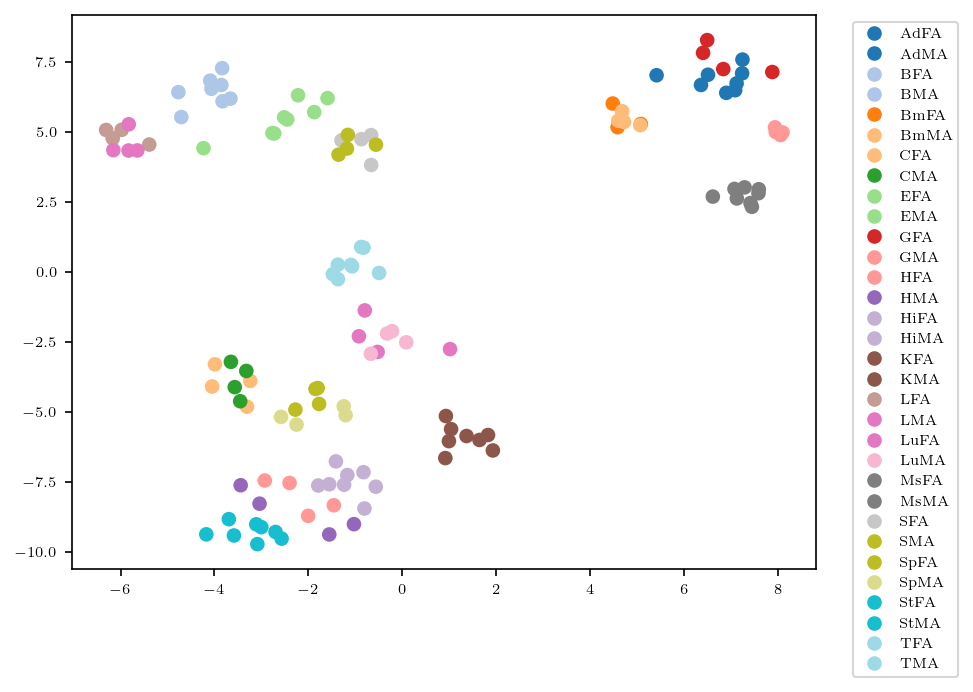

In [8]:
f = plt.figure()
scatter = plt.scatter(*Y_star.T, c = cs, cmap = 'tab20')
plt.legend(handles=scatter.legend_elements(num=len(labels_set))[0], labels=labels_set, bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.legend(handles=scatter.legend_elements()[0], labels=labels)
#plt.legend(labels)

In [9]:
def KL_divergence(X_flat, Y_flat, X_unflattener, Y_unflattener):
    """
    (R^nxp x R^nxp)--> R
    """
    X = X_unflattener(X_flat)
    Y = Y_unflattener(Y_flat)
    learning_rate, perplexity = (200, 30.0)
    P = x2p(X, tol=1e-5, perplexity=perplexity)
    P = (P + np.transpose(P))
    P = P / np.sum(P)      # Why don't we devide by 2N as described everywhere?
    P = np.maximum(P, 1e-12)
    Q, _ = y2q(Y)
    return np.sum(P * (np.log(P+1e-10) - np.log(Q+1e-10)))

primals = (X_flat, Y_flat)
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

In [10]:
from pseudo_IFD_tsne import *

fun = lambda y: KL_divergence(X_flat, y, X_unflattener, Y_unflattener)

In [11]:
H = jax.hessian(fun)(Y_flat)
H_pinv = np.linalg.pinv(H + 1e-3*np.eye(len(H)), hermitian=True)

Computing pairwise distances...
Starting binary search
Entered binary search function


In [13]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

batch_size = 1
b = batch(np.arange(len(Y_flat)), batch_size)
M = np.eye(len(Y_flat))

M_d_y_star_d_x_P_fun = lambda s: M_d_y_star_d_x_P(KL_divergence_fun, primals, s, H_pinv)


In [13]:
time_start = time.time()
for i, j in enumerate(b):
  print(i)
  M_d_y_star_d_x_P_fun(M[j])
#dy_dx = [M_d_y_star_d_x_P_fun(M[i]) for i in b]
time_end = time.time()
print(time_end - time_start)

0
Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function


In [20]:
print(dy_dx)

[]


In [12]:
cov_final = np.dot(np.dot(dy_dx, np.kron(cov2.values, cov1.values)), dy_dx.T)
cov_final = cov_final+1e-3*np.eye(len(cov_final))

In [13]:
print(cov_final)

[[ 0.39895672 -0.04215386  0.01707312 ...  0.05802739 -0.11096439
   0.02543135]
 [-0.04215397  3.5880256   0.49918976 ... -0.20338674 -0.5055476
   0.23968682]
 [ 0.01707311  0.4991898   0.27940524 ... -0.02988503  0.06737113
   0.23730129]
 ...
 [ 0.05802739 -0.20338674 -0.02988503 ...  0.05443148 -0.02738585
  -0.1024177 ]
 [-0.11096437 -0.50554746  0.06737111 ... -0.02738585  0.6938088
   0.07707845]
 [ 0.02543133  0.23968676  0.23730122 ... -0.10241769  0.07707848
   1.0598296 ]]


In [14]:
from utils import equipotential_standard_normal

S = equipotential_standard_normal(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)

/Users/zabel/projects/tsne/diss/utils.py:83: RuntimeWarning: invalid value encountered in divide
  M = np.dot(mu, np.expand_dims(np.cos(theta), axis=0)) + E * np.sin(theta) / theta


In [15]:
np.array([Y_unflattener(i) for i in samples.T])[:, :, 0]

Array([[  7.020743 ,   4.865    ,   7.8052435,   2.237799 ,   5.9051776,
          6.967419 ,   3.5329986,   5.3831124,   4.879172 ,   6.949282 ,
          7.602847 , -12.658344 , -12.858773 , -14.646567 , -12.990576 ,
        -12.856492 ,   2.739809 ],
       [  7.0789247,   5.121526 ,   7.874775 ,   1.8957627,   6.112331 ,
          6.9226933,   3.4689856,   5.6800694,   4.579976 ,   6.868705 ,
          7.585897 , -12.696498 , -12.920889 , -14.814421 , -13.031441 ,
        -12.907646 ,   3.006125 ],
       [  7.022409 ,   5.367036 ,   7.817176 ,   1.8103218,   6.3458567,
          6.743121 ,   3.5061831,   6.0448804,   4.3172135,   6.819277 ,
          7.404976 , -12.752676 , -13.027804 , -14.883869 , -13.164913 ,
        -12.952358 ,   3.3740485],
       [  6.8573203,   5.574926 ,   7.6386895,   1.990735 ,   6.580449 ,
          6.4481616,   3.6405604,   6.4380126,   4.119358 ,   6.8063545,
          7.0796895, -12.820791 , -13.167933 , -14.847387 , -13.376531 ,
        -12.985784 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Thp_0h', 'Th2+TGFbeta_2h', 'Th2+TGFbeta_6h', 'Th0_2h', 'Th0_6h', 'Th1_6h', 'Th1+TGFbeta_2h', 'Th1+TGFbeta_6h', 'Th2_2h', 'Th2_6h', 'Thp_0h', 'Th1_48h', 'Th1+TGFbeta_48h', 'Th2_48h', 'Th2+TGFbeta_48h', 'Th0_48h', 'Th1_2h']

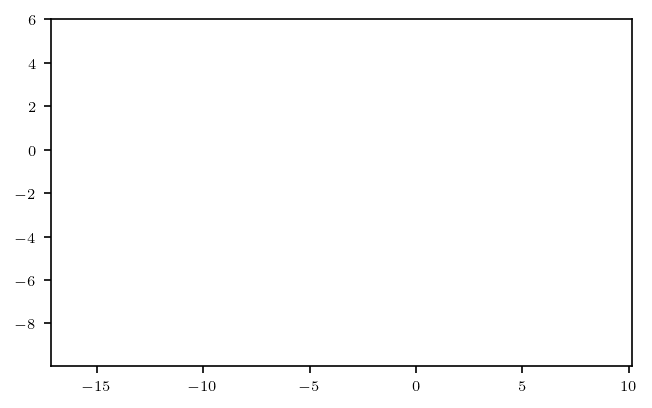

In [18]:
from animate_ifd import *
animate(samples, [i for i in range(Y_star.shape[0])], 'datasets/Thcells/animation.gif')

(100, 34)


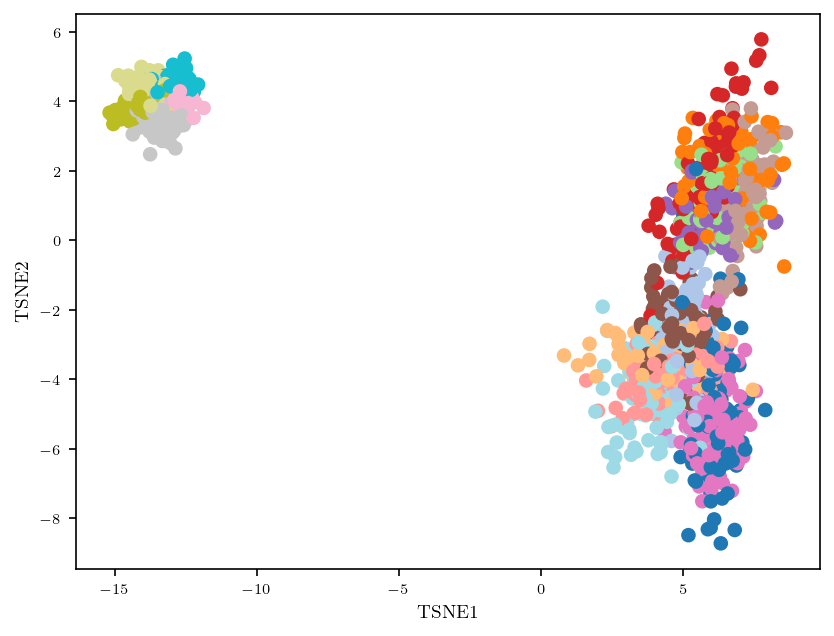

In [17]:
draw_and_plot_samples(Y_flat, Y_unflattener, cov_final, 100, 'tnse_distr.pdf')

In [21]:
print(cov1.shape, cov2.shape)

(17, 17) (50, 50)


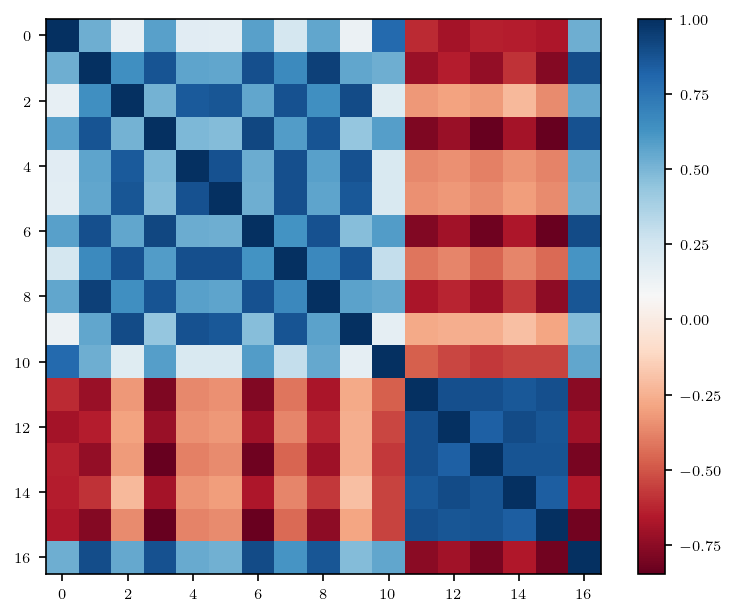

In [22]:
f = plt.figure()
plt.imshow(cov1, cmap='RdBu')
plt.colorbar()


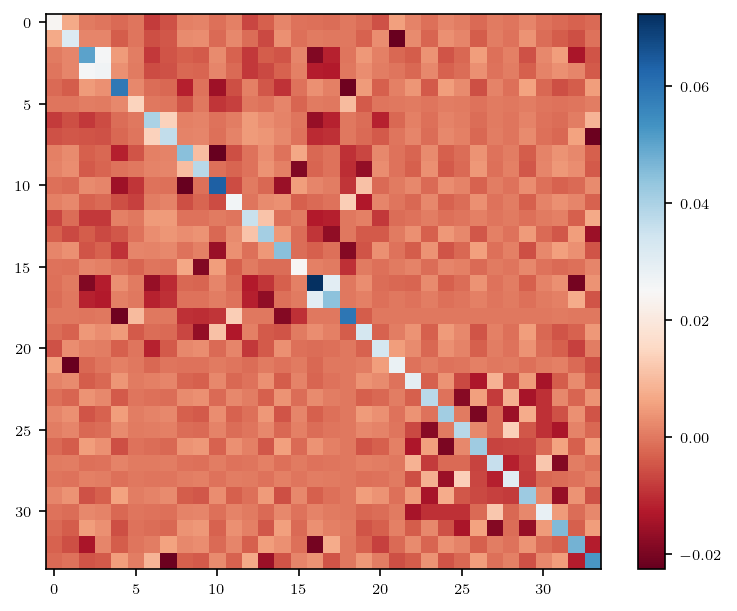

In [23]:
f = plt.figure()
plt.imshow(H, cmap='RdBu')
plt.colorbar()

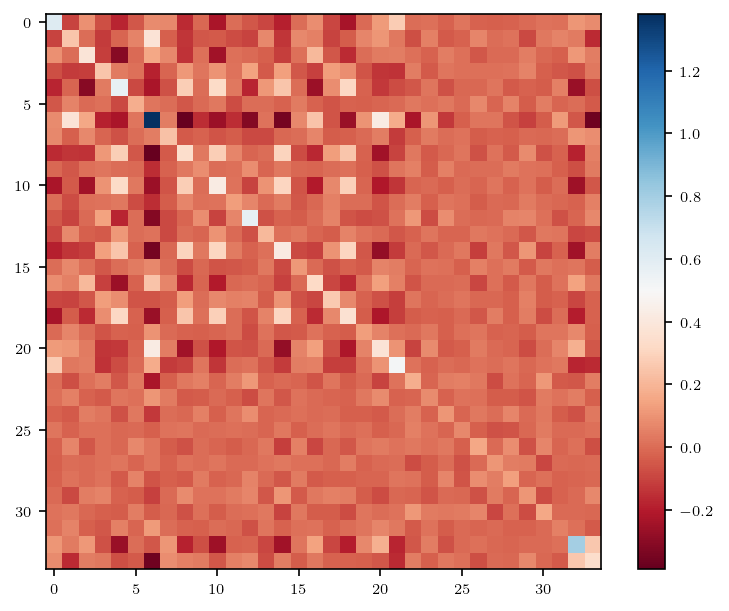

In [24]:
f = plt.figure()
plt.imshow(cov_final, cmap='RdBu')
plt.colorbar()

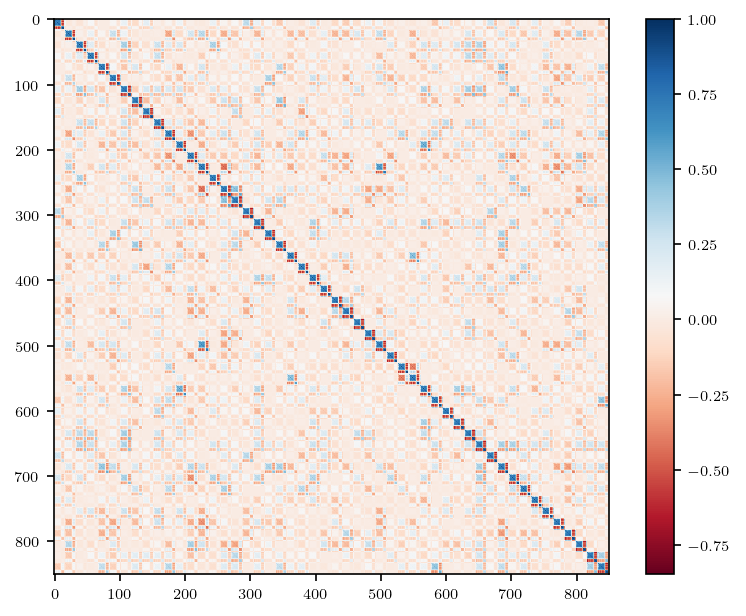

In [25]:
f = plt.figure()
plt.imshow(np.kron(cov2.values, cov1.values), cmap='RdBu')
plt.colorbar()

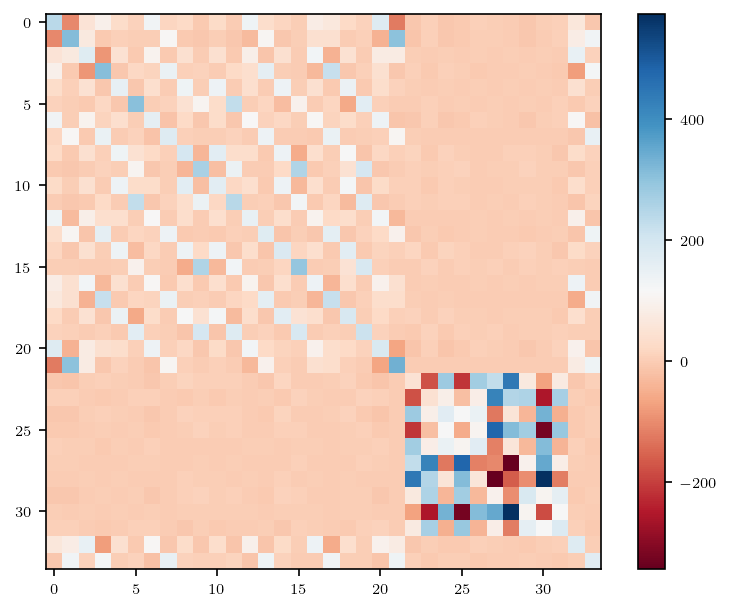

In [26]:
f = plt.figure()
plt.imshow(H_pinv, cmap='RdBu')
plt.colorbar()

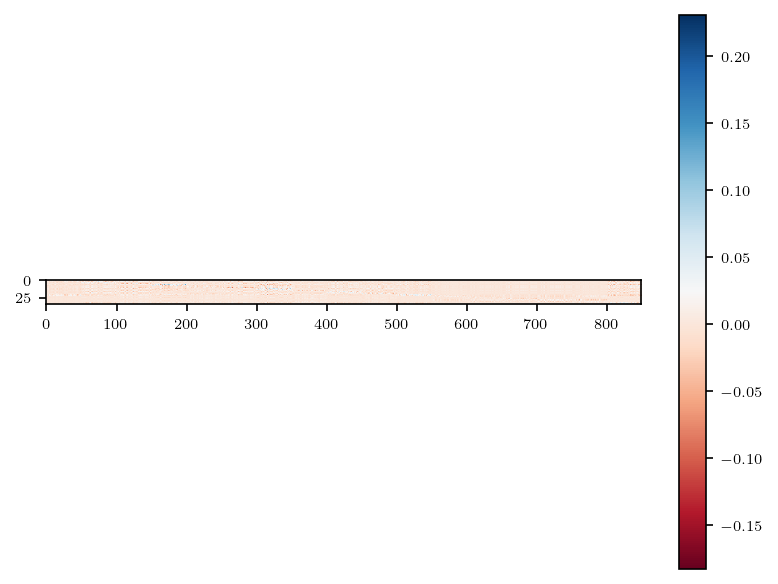

In [30]:
f = plt.figure()
plt.imshow(dy_dx, cmap='RdBu')
plt.colorbar()